In [2]:
%load_ext autoreload
%autoreload 2

import up42

import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

# AOI

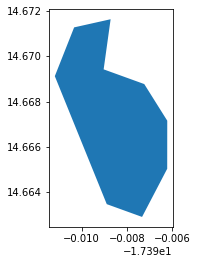

In [4]:
aoi = gpd.read_file("aois/extent_dakar_goree.geojson")
aoi.plot()
plt.show()

# Find available images

In [48]:
# Authentificate: Gets the the credentials saved in the config.json file.
api = up42.Api(auth_type="account", cfg_file="/Users/christoph.rieke/repos/up42-py/examples/config.json", env="dev")

catalog = up42.Catalog(api=api)
search_paramaters = catalog.construct_parameters(geometry=aoi, 
                                                start_date="2015-01-01",
                                                end_date="2016-12-31",
                                                sensors=["pleiades"],
                                                max_cloudcover=100, 
                                                sortby="acquisitionDate", 
                                                limit=100)
search_paramaters

2020-03-11 18:46:03,197 - up42.api - INFO - Got credentials from config.json.
2020-03-11 18:46:03,198 - up42.api - INFO - Using authentification type - UP42AccountAPI


{'datetime': '2015-01-01T00:00:00Z/2016-12-31T00:00:00Z',
 'intersects': {'type': 'Polygon',
  'coordinates': (((-17.401179, 14.669121),
    (-17.400326, 14.671276),
    (-17.398714, 14.671636),
    (-17.399022, 14.669422),
    (-17.397228, 14.668772),
    (-17.396212, 14.667154),
    (-17.396214, 14.665031),
    (-17.397325, 14.662903),
    (-17.398884, 14.663467),
    (-17.401179, 14.669121)),)},
 'limit': 100,
 'query': {'cloudCoverage': {'lte': 100},
  'dataBlock': {'in': ['oneatlas-pleiades-fullscene',
    'oneatlas-pleiades-aoiclipped']}},
 'sortby': [{'field': 'properties.acquisitionDate', 'direction': 'asc'}]}

In [49]:
results = catalog.search(search_paramaters=search_paramaters, format="df")
results

,geometry,id,acquisitionDate,constellation,providerName,blockNames,cloudCoverage,providerProperties
0,"POLYGON ((-17.46148 14.90374, -17.46188 14.600...",6bdd467e-07b1-4a5e-86aa-ddaba1ff6cbf,2015-02-26T11:53:54Z,PHR,oneatlas,"[oneatlas-pleiades-fullscene, oneatlas-pleiade...",0.00,"{'commercialReference': 'SO20006844', 'acquisi..."
1,"POLYGON ((-17.46259 14.83560, -17.46286 14.617...",b83e89f1-e073-49de-8a65-ee650dff0524,2015-04-19T11:54:03Z,PHR,oneatlas,"[oneatlas-pleiades-fullscene, oneatlas-pleiade...",0.00,"{'commercialReference': 'SO20006844', 'acquisi..."
2,"POLYGON ((-17.46037 14.84296, -17.46011 14.617...",9c486cb6-bb93-4fcb-abc3-c72ad8fe1eee,2015-04-20T11:46:10Z,PHR,oneatlas,"[oneatlas-pleiades-fullscene, oneatlas-pleiade...",0.00,"{'commercialReference': 'SO20006844', 'acquisi..."
3,"POLYGON ((-17.55800 14.81594, -17.55752 14.627...",4429d75f-db7b-4bb6-a889-23d92bff892f,2015-06-18T11:42:21Z,PHR,oneatlas,"[oneatlas-pleiades-fullscene, oneatlas-pleiade...",0.00,"{'commercialReference': 'SO20006844', 'acquisi..."
4,"POLYGON ((-17.55513 14.82190, -17.55464 14.636...",b7d2daac-48f1-416b-ba94-dcb773c33618,2015-06-18T11:42:40Z,PHR,oneatlas,"[oneatlas-pleiades-fullscene, oneatlas-pleiade...",0.00,"{'commercialReference': 'SO20006844', 'acquisi..."
5,"POLYGON ((-17.54392 14.81286, -17.54390 14.632...",6c151984-25a8-43d4-ab84-afef78fa24f8,2015-09-03T11:50:40Z,PHR,oneatlas,"[oneatlas-pleiades-fullscene, oneatlas-pleiade...",13.18,"{'commercialReference': 'SO20006844', 'acquisi..."
6,"POLYGON ((-17.54409 14.81186, -17.54414 14.629...",942187d6-c637-4f7b-84a5-3b91a59e2d97,2015-09-03T11:51:00Z,PHR,oneatlas,"[oneatlas-pleiades-fullscene, oneatlas-pleiade...",13.86,"{'commercialReference': 'SO20006844', 'acquisi..."
7,"POLYGON ((-17.54455 14.81221, -17.54449 14.632...",29b6925a-17fe-42bf-9914-859a10f8314a,2015-10-12T11:50:12Z,PHR,oneatlas,"[oneatlas-pleiades-fullscene, oneatlas-pleiade...",0.00,"{'commercialReference': 'SO20006844', 'acquisi..."
8,"POLYGON ((-17.54412 14.81222, -17.54411 14.634...",5c16e151-99bd-4c67-b50e-75790ea7aa68,2015-10-12T11:50:22Z,PHR,oneatlas,"[oneatlas-pleiades-fullscene, oneatlas-pleiade...",0.00,"{'commercialReference': 'SO20006844', 'acquisi..."
9,"POLYGON ((-17.54470 14.81143, -17.54471 14.631...",b8f47628-3337-4e6e-92fa-c5ef0793ec05,2015-10-12T11:50:32Z,PHR,oneatlas,"[oneatlas-pleiades-fullscene, oneatlas-pleiade...",0.00,"{'commercialReference': 'SO20006844', 'acquisi..."


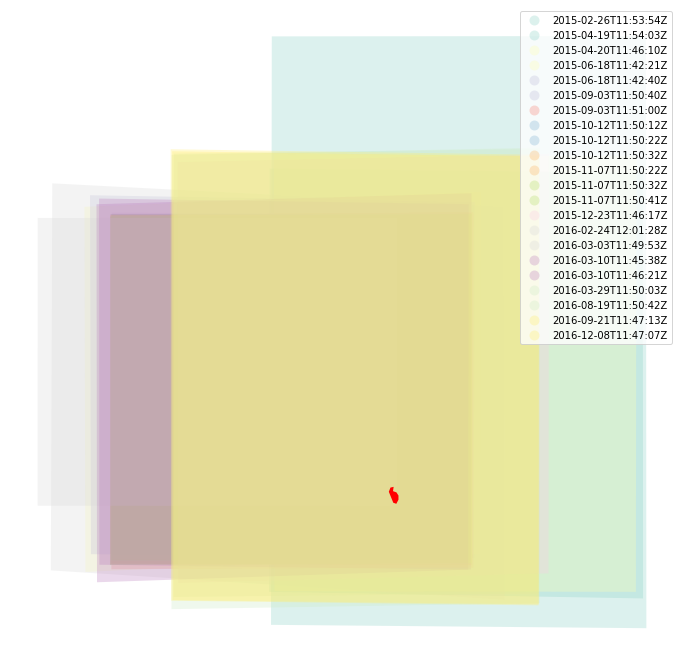

In [53]:
# spatially different colors.
#from greedy import greedy
#if "greedy_colors" not in results.columns:
#    results["greedy_colors"]=greedy(results)
#ax = results.plot('greedy_colors', categorical=True, figsize=(12, 16), cmap='Set3', legend=True, alpha=0.4)

# all different colors
ax = results.plot('acquisitionDate', categorical=True, figsize=(12, 16), cmap='Set3', legend=True, 
                  alpha=0.3)
aoi.plot(color="r", ax=ax)
ax.set_axis_off()

# Mosaicing strategy

## Mosaic specific ids

# Mosaic all in timeframe